In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

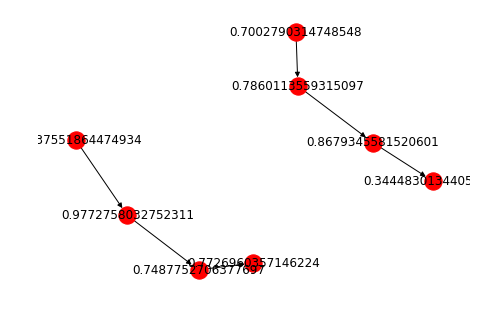

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Build your graph

df = pd.DataFrame(np.random.rand(2,4),columns=list('ABCD')) #Create a 4 column data frame

columns = list(df.columns.values)# Get columns name

g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

for i in range(len(columns)-1):
    g.add_edges_from(zip(df[columns[i]], df[columns[i+1]])) #Create edge between 2 values, between all consecutive coumns

# Plot it
nx.draw(g, with_labels=True)
plt.show()

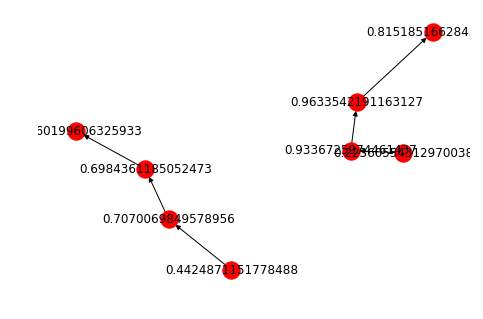

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Build your graph

df = pd.DataFrame(np.random.rand(2,4),columns=list('ABCD')) #Create a 4 column data frame

columns = list(df.columns.values)# Get columns name

# G = nx.cubical_graph()
# pos = nx.spring_layout(G)

g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

for i in range(len(columns)-1):
    g.add_edges_from(zip(df[columns[i]], df[columns[i+1]])) #Create edge between 2 values, between all consecutive coumns

# Plot it
nx.draw(g, with_labels=True)
plt.show()

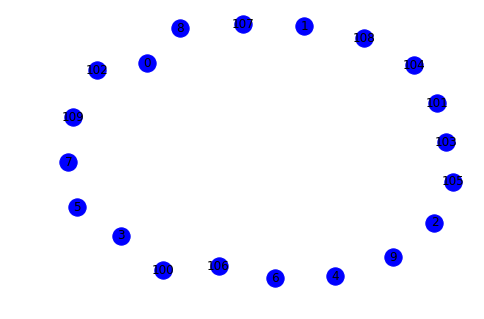

In [7]:
G = nx.DiGraph()
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))
H = nx.path_graph(10)
G.add_nodes_from(H)
nx.draw(G, with_labels=True, node_color = 'b')

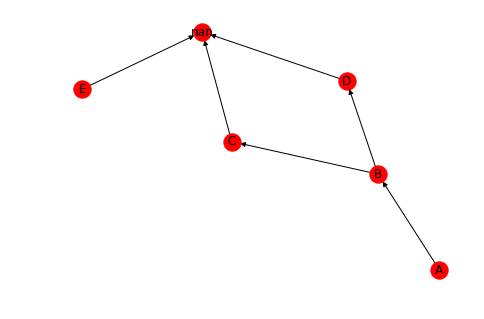

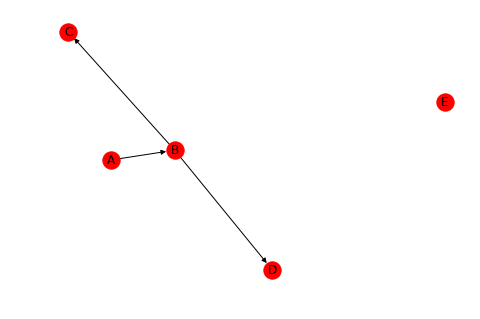

In [14]:
# t3 = pd.DataFrame(np.random.rand(2,4),columns=list('ABCD')) #Create a 4 column data frame

columns = list(t3.columns.values)# Get columns name

g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

for i in range(len(columns)-1):
    g.add_edges_from(zip(t3[columns[i]], t3[columns[i+1]])) #Create edge between 2 values, between all consecutive coumns

# Plot it
nx.draw(g, with_labels=True)
plt.show()

g.remove_node(np.nan)
nx.draw(g, with_labels=True)
plt.show()

In [8]:
t1 = pd.read_excel(r'F:\CI007\POD Migration\Problematic Scenarios\Stackoverflow Question\Sample.xlsx',
             dtype = {'id':str, 'previous_id':str})
t2 = pd.merge(t1, t1, left_on= 'id', right_on= 'previous_id', how = 'left')
t3 = t2[['Firm_x', 'Firm_y']].rename(columns = {'Firm_x':'from', 'Firm_y':'to'})
t3

,from,to
0,A,B
1,B,C
2,B,D
3,C,NaN
4,D,NaN
5,E,NaN


<Figure size 864x648 with 0 Axes>

{'Food\nProduction': Text(1, 1, 'Food\nProduction'),
 'Transportation': Text(1, 2, 'Transportation'),
 'Energy\nProduction': Text(1, 3, 'Energy\nProduction'),
 'Greenhouse\nGas\nEmissions': Text(2, 2, 'Greenhouse\nGas\nEmissions'),
 'Climate\nChange': Text(3, 2, 'Climate\nChange'),
 'Climate\nFeedbacks': Text(2.5, 3, 'Climate\nFeedbacks'),
 'Everyone$^{Dies}$': Text(4, 2, 'Everyone$^{Dies}$')}

(0, 4.5)

(0, 4)

(0.0, 4.5, 0.0, 4.0)

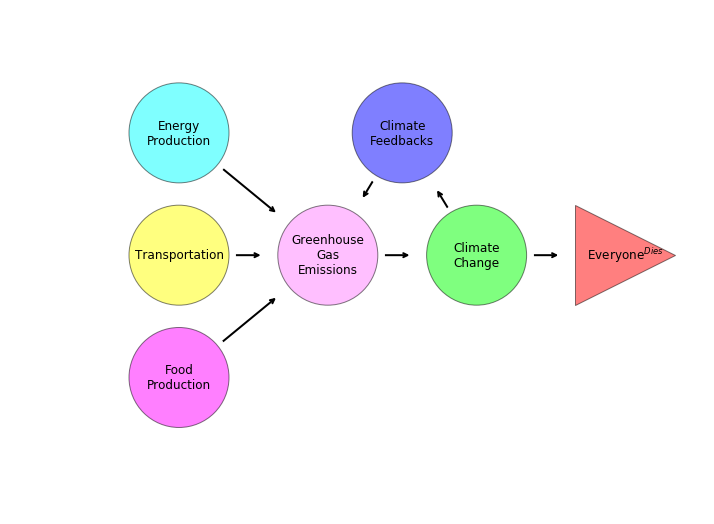

In [5]:
plt.figure(figsize = (12,9))

From = ['Food\nProduction', 'Transportation', 'Energy\nProduction',
        "Greenhouse\nGas\nEmissions",'Climate\nChange','Climate\nFeedbacks','Greenhouse\nGas\nEmissions',
        'Climate\nChange']
To = ["Greenhouse\nGas\nEmissions", "Greenhouse\nGas\nEmissions",
      "Greenhouse\nGas\nEmissions",'Climate\nChange','Climate\nFeedbacks','Greenhouse\nGas\nEmissions',
      'Climate\nChange','Everyone$^{Dies}$']

df = pd.DataFrame({ 'from':From,
                   'to':To})
# Define Node Positions
pos = {'Food\nProduction':(1,1),
        'Transportation':(1,2),
        'Energy\nProduction':(1,3),
        'Greenhouse\nGas\nEmissions':(2,2),
        'Climate\nChange':(3,2),
        'Climate\nFeedbacks':(2.5,3),
        'Everyone$^{Dies}$':(4,2)}

# Define Node Colors
NodeColors = {'Food\nProduction':[1,0,1],
        'Transportation':[1,1,0],
        'Energy\nProduction':[0,1,1],
        'Greenhouse\nGas\nEmissions':[1,.5,1],
        'Climate\nChange':[0,1,0],
        'Climate\nFeedbacks':[0,0,1],
        'Everyone$^{Dies}$':[1,0,0]}

Labels = {}
i = 0
for a in From:
    Labels[a]=a
    i +=1
Labels[To[-1]]=To[-1]

# Build your graph. Note that we use the DiGraph function to create the graph! This adds arrows
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

# Define the colormap and set nodes to circles, but the last one to a triangle
Circles = []
Traingle = []
Colors_Circles = []
Colors_Traingle = []
for n in G.nodes:
    if n != 'Everyone$^{Dies}$':
        Circles.append(n)
        Colors_Circles.append(NodeColors[n])
    else:
        Traingle.append(n)
        Colors_Traingle.append(NodeColors[n])

# By making a white node that is larger, I can make the arrow "start" beyond the node
nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Circles,
                       node_size=1.25e4,
                       node_shape='o',
                       node_color='white',
                       alpha=1)

nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Circles,
                       node_size=1e4,
                       node_shape='o',
                       node_color=Colors_Circles,
                       edgecolors='black',
                       alpha=0.5)


nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Traingle,
                       node_size=1.25e4,
                       node_shape='>',
                       node_color='white',
                       alpha=1)

nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Traingle,
                       node_size=1e4,
                       node_shape='>',
                       node_color=Colors_Traingle,
                       edgecolors='black',
                       alpha=0.5)


nx.draw_networkx_labels(G, pos, Labels, font_size=12)

# Again by making the node_size larer, I can have the arrows end before they actually hit the node
edges = nx.draw_networkx_edges(G, pos, node_size=1.8e4,
                               arrowstyle='->',width=2,arrowsizes=10)

plt.xlim(0,4.5)
plt.ylim(0,4)
plt.axis('off')
plt.show()